# Tarea 07: Splines Cúbicos
### Nombre: Lindsay Guzmán

1. Dados los puntos $(0,1),(1,5),(2,3)$, determine el spline cúbico. 

In [28]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs
    # Completar alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        # Completar z
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        # Completar a
        a = ys[j]
        print(j, a, b, c[j], d)
        #Completar S
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spline(xs, ys, spline_func, title = 'Spline cúbico'):
    x_sym = sym.Symbol('x')
    splines = spline_func(xs, ys)

    X = np.linspace(xs[0], xs[-1], 500)
    Y = []

    for xi in X:
        for j in range(len(xs)-1):
            if xs[j] <= xi <= xs[j+1]:
                Y.append(float(splines[j].subs(x_sym, xi)))
                break

    plt.figure(figsize=(6,4))
    plt.plot(X, Y, label='Spline', color ='blue')
    plt.scatter(xs, ys, color = 'magenta', label = 'Puntos')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


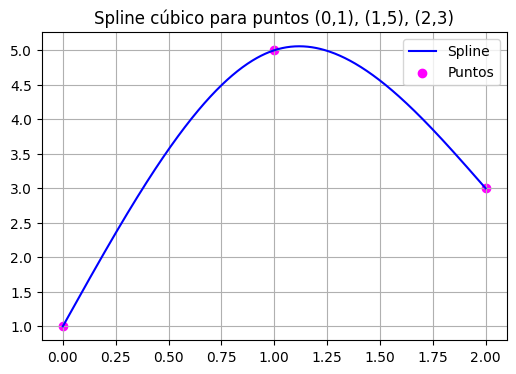

In [30]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]# display da los splines sin expandir 
print("______")
_ = [display(s.expand()) for s in splines]

plot_spline(xs, ys, cubic_spline, title='Spline cúbico para puntos (0,1), (1,5), (2,3)')

2. Dados los puntos (-1,1), (1,3), determine el spline cúbico sabiendo que $f'(x_0) = 1, f'(x_n) = 2$

In [31]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], B0: float, B1: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - B0, B1: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [32]:
xs = [-1, 1]
ys = [1, 3]
B0 = 1
B1 = 2

splines = cubic_spline_clamped(xs, ys, B0, B1)
x = sym.Symbol("x")
sym.pprint(splines[0])


0 1 1.0 -0.5 0.25
                    3              2      
1.0⋅x + 0.25⋅(x + 1)  - 0.5⋅(x + 1)  + 2.0


3. Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en 
base a ese pseudocódigo complete la siguiente función: 

$alpha = [0] * (n + 1)$


4. Usando la función anterior, encuentre el spline cúbico para: 

xs = [1, 2, 3]
ys = [2, 3, 5]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


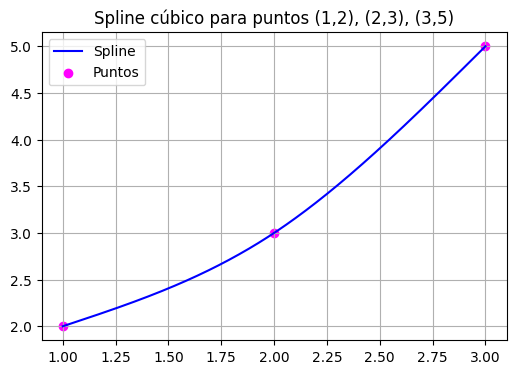

In [33]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]
plot_spline(xs, ys, cubic_spline, title='Spline cúbico para puntos (1,2), (2,3), (3,5)')

5. Usando la función anterior, encuentre el spline cúbico para:

xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


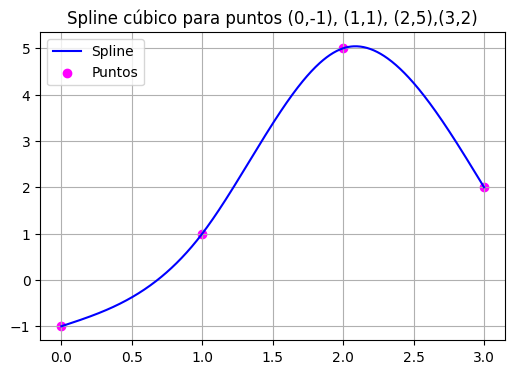

In [34]:
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]
plot_spline(xs, ys, cubic_spline, title='Spline cúbico para puntos (0,-1), (1,1), (2,5),(3,2)')